In [155]:
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
df = pd.read_csv("S02-hw-dataset.csv")

In [157]:
df.head()
# output the five top rows of table

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [158]:
df.info()
# Information about columns(types and Non-Null count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [159]:
df.describe()
# some statics methods of data in my table

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [160]:
print(
    "user_id:", df['user_id'].isna().mean(),
    "\nage:", df['age'].isna().mean(),
    "\ncountry:", df['country'].isna().mean(),
    "\npurchases", df['purchases'].isna().mean(),
    "\nrevenue", df['revenue'].isna().mean(),
)

user_id: 0.0 
age: 0.04878048780487805 
country: 0.0 
purchases 0.0 
revenue 0.0


In [161]:
df['age'].isna().sum()

np.int64(2)

In [162]:
df['age'].duplicated().sum()

np.int64(12)

In [163]:
df['purchases'].duplicated().sum()

np.int64(29)

In [164]:
df["country"].duplicated().sum()

np.int64(36)

In [165]:
df["revenue"].duplicated().sum()

np.int64(4)

In [166]:
df[df["purchases"] < 0] # Это нелогичный случай, так как не может быть отрицательным покупки

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [167]:
df[df["revenue"] < 0]

,user_id,age,country,purchases,revenue


In [168]:
df[(df['age'] < 0) | (df['age'] > 100)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [169]:
"""
    Purchases < 0 (user_id = 6) это нелогичный случай, так как колво покупок не может быть отрицательным
    Revenue < 0 не нашлось (это нелогичный случай, так как сумма цен покупок не может быть отрицательным числом)
    age > 100 (user_id = 6) нелогичный случай, так как покупатель, которому больше 100 лет очень странно

    Очевидно, что user_id = 6 является выбросом в этом датасете
"""

'\n    Purchases < 0 (user_id = 6) это нелогичный случай, так как колво покупок не может быть отрицательным\n    Revenue < 0 не нашлось (это нелогичный случай, так как сумма цен покупок не может быть отрицательным числом)\n    age > 100 (user_id = 6) нелогичный случай, так как покупатель, которому больше 100 лет очень странно\n\n    Очевидно, что user_id = 6 является выбросом в этом датасете\n'

In [170]:
df['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [171]:
df.groupby('country')['purchases'].sum()

country
CN     9
DE    39
FR    51
RU    62
US    37
Name: purchases, dtype: int64

In [172]:
df.groupby('country')['revenue'].mean()

country
CN    1054.000000
DE    1445.500000
FR     675.916667
RU     790.076923
US     557.375000
Name: revenue, dtype: float64

In [173]:
age_bins = [0, 18, 26, 36, 51, 101, 150]
age_labels = ['<18', '18-25', '26-35', '36-50', '51-101', '101-150']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

In [174]:
purchases_bins = [0, 3, 6, 8, 11]
purchases_labels = ['<3', '3-6', '7-8', '9-11']

df['purchases_group'] = pd.cut(df['purchases'], bins=purchases_bins, labels=purchases_labels)

In [175]:
df

,user_id,age,country,purchases,revenue,age_group,purchases_group
0,1,25.0,FR,7,749,18-25,7-8
1,2,24.0,RU,5,1115,18-25,3-6
2,3,52.0,FR,7,399,51-101,7-8
3,4,31.0,RU,6,654,26-35,3-6
4,5,NaN,DE,6,1296,NaN,3-6
5,6,120.0,FR,-1,785,101-150,NaN
6,7,46.0,RU,0,0,36-50,NaN
7,8,28.0,CN,2,456,26-35,<3
8,9,39.0,US,4,980,36-50,3-6
9,10,24.0,RU,7,511,18-25,7-8


In [176]:
"""
    Данных покупок из Китая (CN) довольно мало по сравнению с другими, а кол-во данных из РФ (RU) больше всего

    Средняя сумма покупок из Германии (DE) выше остальных, а из US меньше всего

    Сделал bins по возрасту и кол-во покупок
"""

'\n    Данных покупок из Китая (CN) довольно мало по сравнению с другими, а кол-во данных из РФ (RU) больше всего\n\n    Средняя сумма покупок из Германии (DE) выше остальных, а из US меньше всего\n\n    Сделал bins по возрасту и кол-во покупок\n'

'\n    Как видно большое количество покупателей в возрасте от 18 до 50\n'

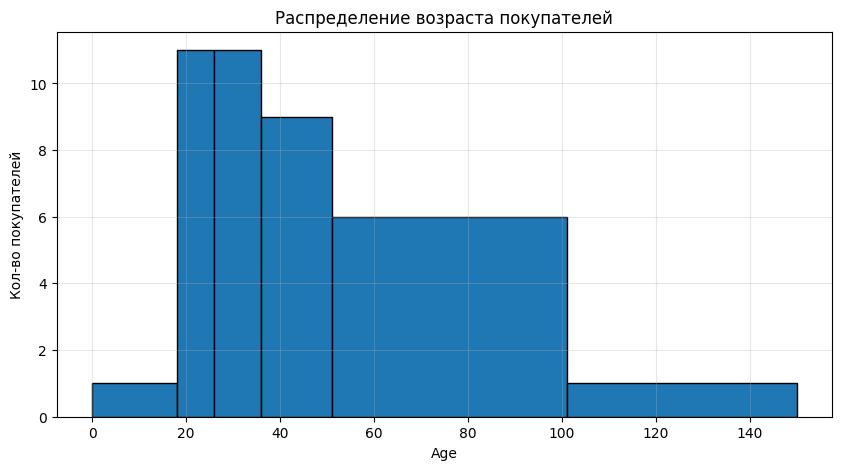

In [177]:
# Hist график распределения возраста покупателей
plt.figure(figsize=[10, 5])
plt.hist(df['age'], bins=age_bins, edgecolor='black')
plt.title('Распределение возраста покупателей')
plt.xlabel('Age')
plt.ylabel('Кол-во покупателей')
plt.grid(alpha=0.3)
plt.savefig('./figures/age_bins.png', dpi=300)

"""
    Как видно большое количество покупателей в возрасте от 18 до 50
"""

'\n    Видим, что есть выбросы, которые не естественны для остального датасета\n'

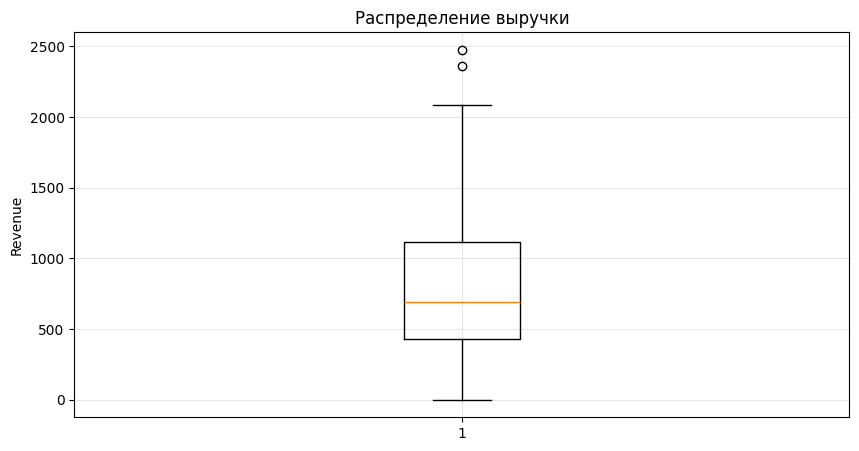

In [178]:
# Boxplot Распределения выручки
plt.figure(figsize=[10, 5])
plt.boxplot(df['revenue'], vert=True)
plt.title('Распределение выручки')
plt.ylabel('Revenue')
plt.grid(alpha=0.3)
plt.savefig('./figures/revenue_boxplot.png', dpi=300)

"""
    Видим, что есть выбросы, которые не естественны для остального датасета
"""

'\n    Видим, что самая высокая выручка в Германии (DE), самая низкая в Америке (US)\n'

<Figure size 1000x600 with 0 Axes>

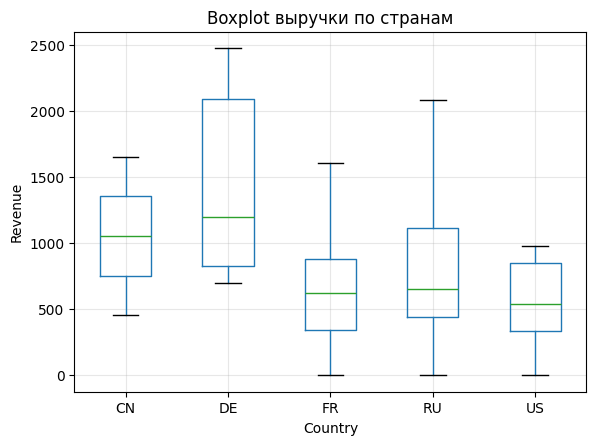

In [179]:
plt.figure(figsize=[10, 6])
df.boxplot(column='revenue', by='country', grid=False)
plt.title("Boxplot выручки по странам")
plt.suptitle('')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.grid(alpha=0.3)
plt.savefig('./figures/revenue_by_country_boxplot.png', dpi=300)

"""
    Видим, что самая высокая выручка в Германии (DE), самая низкая в Америке (US)
"""

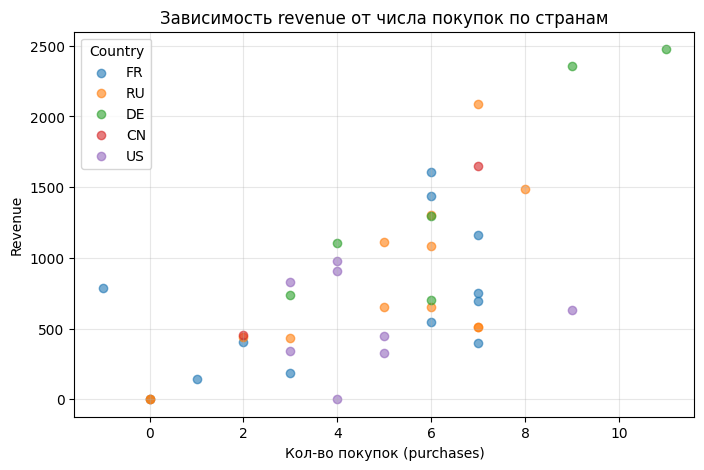

'\n    Видим, что самая большая зависимость выручки от числа покупок в Германии (DE), самая низкая в Америке (US)\n'

In [180]:
plt.figure(figsize=(8, 5))

for c in df['country'].unique():
    sub = df[df['country'] == c]
    plt.scatter(sub['purchases'],
                sub['revenue'],
                alpha=0.6,
                label=c)

plt.title("Зависимость revenue от числа покупок по странам")
plt.xlabel("Кол-во покупок (purchases)")
plt.ylabel("Revenue")
plt.grid(alpha=0.3)
plt.legend(title="Country")

plt.savefig("./figures/scatter_by_country.png", dpi=300)
plt.show()
"""
    Видим, что самая большая зависимость выручки от числа покупок в Германии (DE), самая низкая в Америке (US)
"""